In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/Yash Shetty/Downloads/customer_analytics_fmcg-main/customer_analytics_fmcg-main/segmentation data.csv', index_col = 0)
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


In [5]:
sum(df.duplicated())

0

In [7]:
df.isna().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [8]:
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [9]:
df.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


Text(0.5, 1.0, 'Correlation')

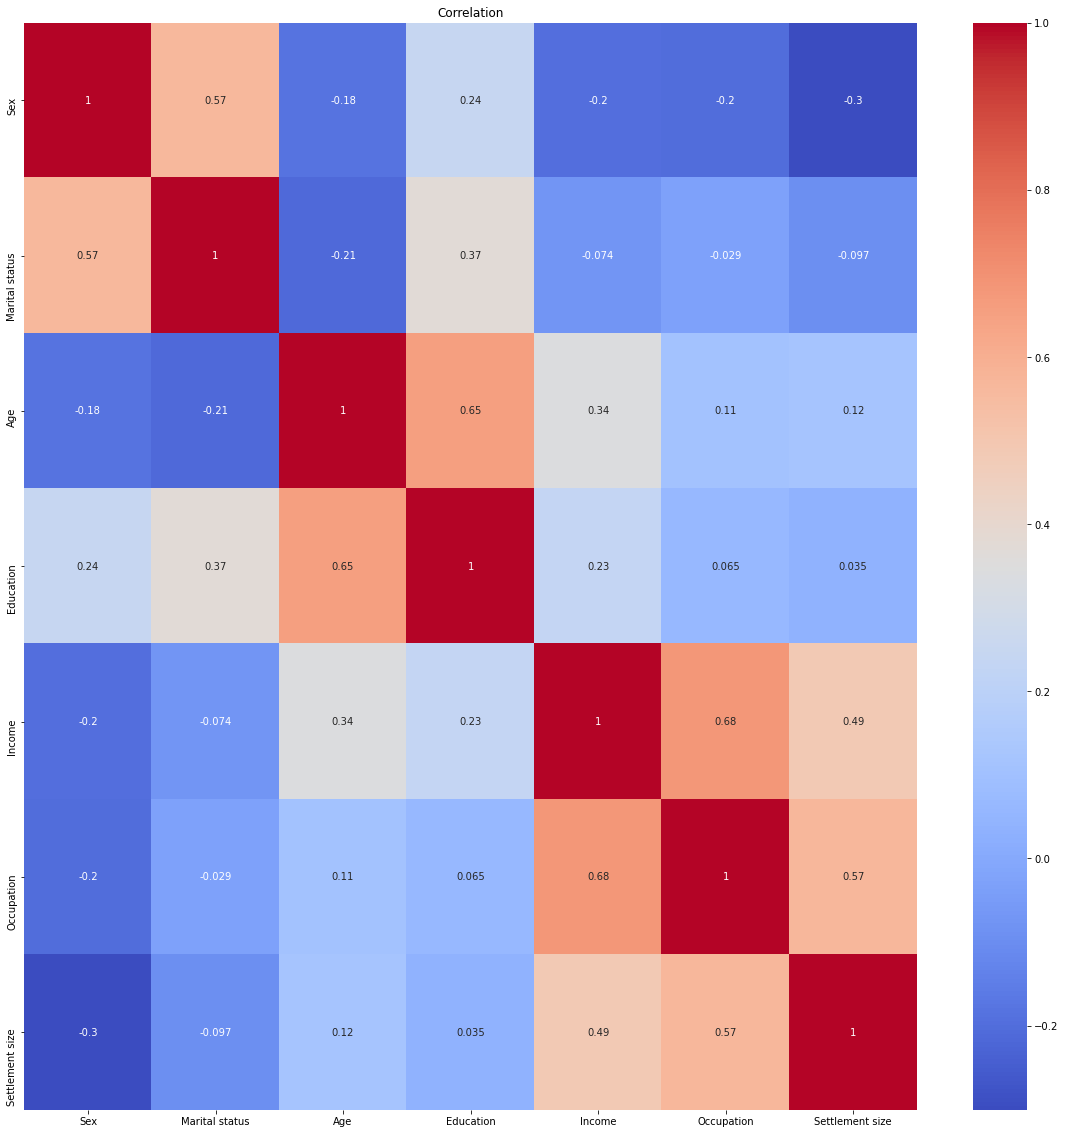

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm").set_title('Correlation')

C:\Users\Yash Shetty\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Visualisation of Raw Data')

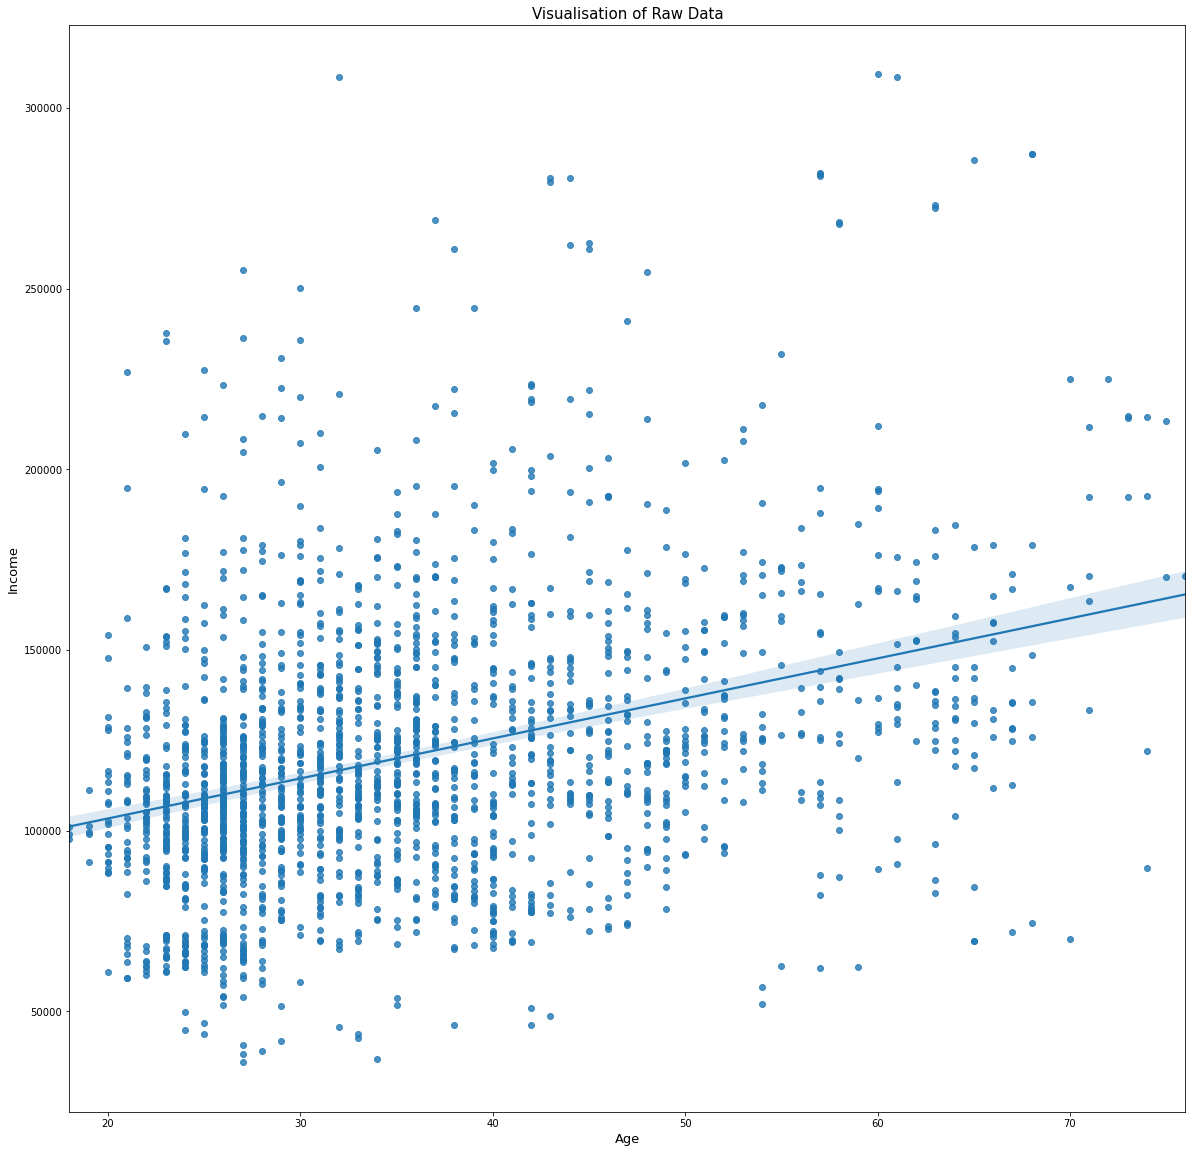

In [16]:
plt.figure(figsize =(20, 20))
sns.regplot(df['Age'], df['Income'])
plt.xlabel('Age', fontsize = 13)
plt.ylabel('Income', fontsize = 13)
plt.title('Visualisation of Raw Data', fontsize = 15)

In [17]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage
hier_clust = linkage(df_scaled, method = 'ward')

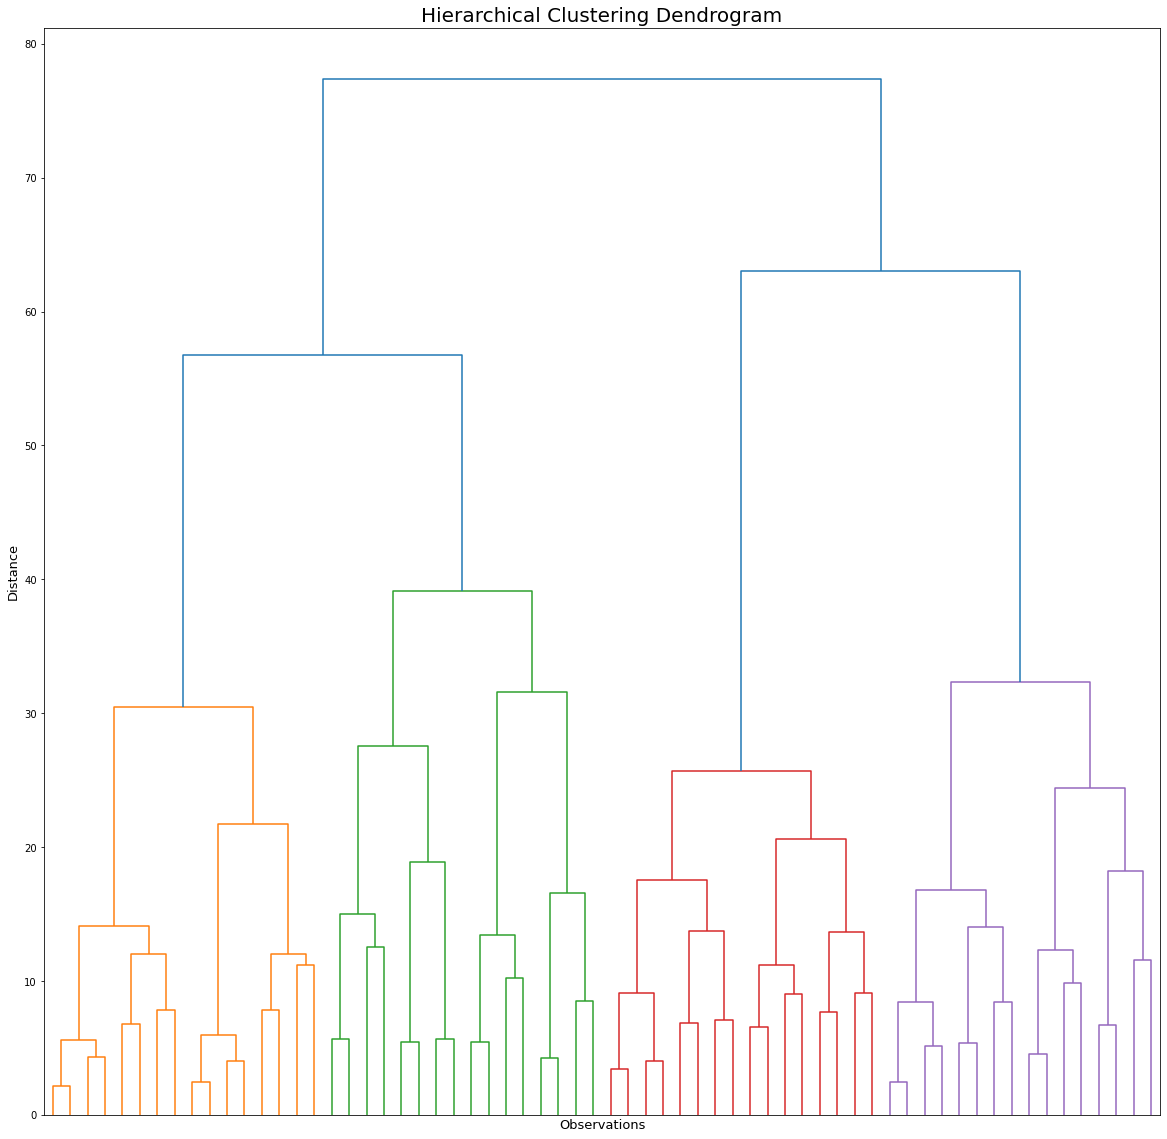

In [19]:
plt.figure(figsize =(20,20))
plt.title('Hierarchical Clustering Dendrogram', fontsize =20)
plt.ylabel('Distance',  fontsize =13)
plt.xlabel('Observations',  fontsize =13)
dendrogram(hier_clust, show_leaf_counts =False,
           truncate_mode = 'level', 
           p = 5, 
           no_labels = True 
          )
plt.show()

In [20]:
from sklearn.cluster import KMeans

In [21]:
w = {}
for i in range(1, 11): 
    kmeans = KMeans(n_clusters =i, init = 'k-means++')
    kmeans.fit(df_scaled)
    w[i] = kmeans.inertia_

Text(0.5, 1.0, 'K-means Clustering - Elbow Method')

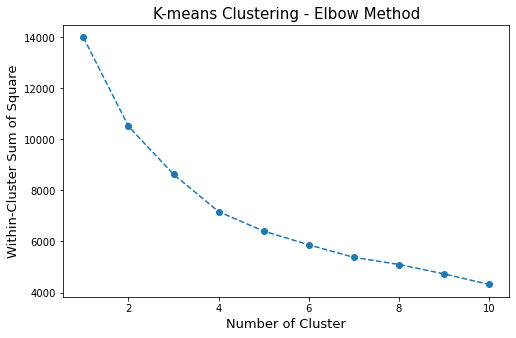

In [22]:
plt.figure(figsize =(8,5))
plt.plot(list(w.keys()), list(w.values()),  marker = 'o', linestyle = '--' )

plt.xlabel('Number of Cluster', fontsize = 13)
plt.ylabel('Within-Cluster Sum of Square', fontsize = 13)
plt.title('K-means Clustering - Elbow Method', fontsize = 15)

In [24]:
!pip install kneed

In [25]:
from kneed import KneeLocator
x, y = list(w.keys()), list(w.values())
kn = KneeLocator(x, y, curve='convex', direction='decreasing')
print('The optimal number of clusters, suggested by Elbow criterion: ', kn.knee)

The optimal number of clusters, suggested by Elbow criterion:  4


https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

In [27]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.24820106944568027
For n_clusters = 3 The average silhouette_score is : 0.27177060998494357
For n_clusters = 4 The average silhouette_score is : 0.26879180394522123
For n_clusters = 5 The average silhouette_score is : 0.2611427824881617
For n_clusters = 6 The average silhouette_score is : 0.2630752333415311


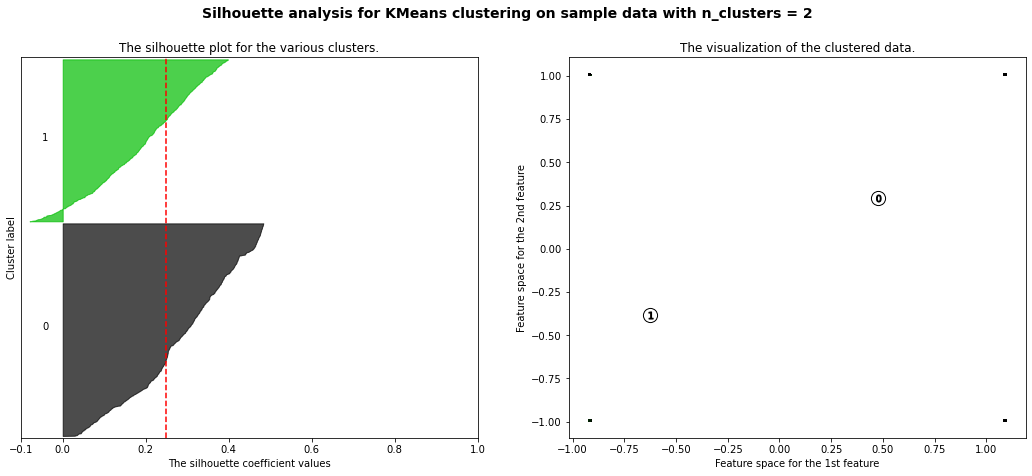

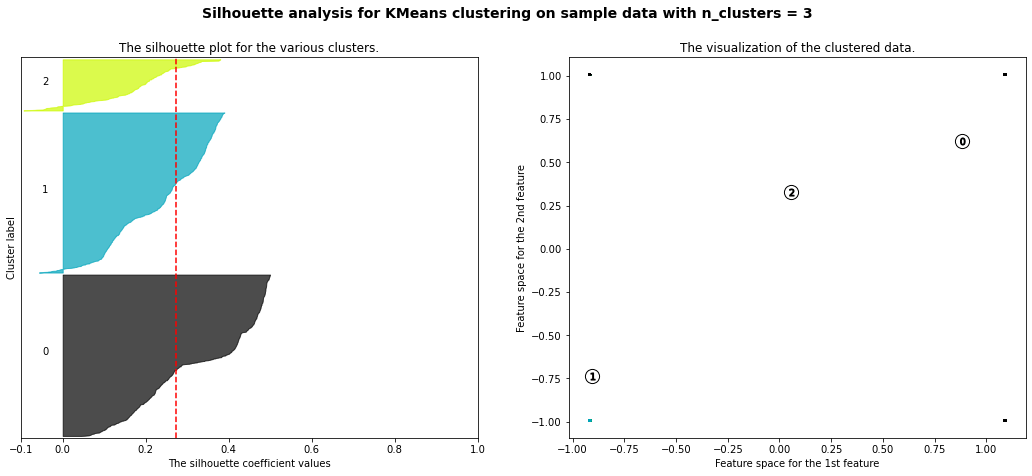

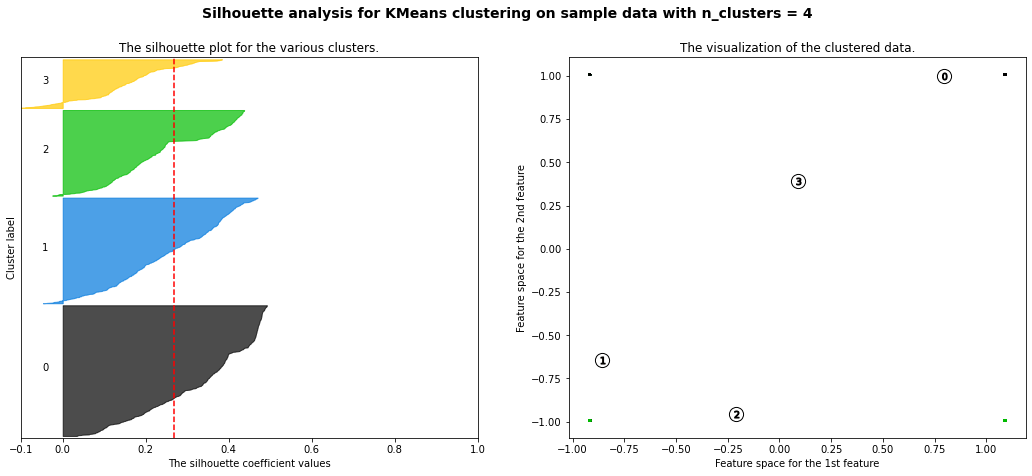

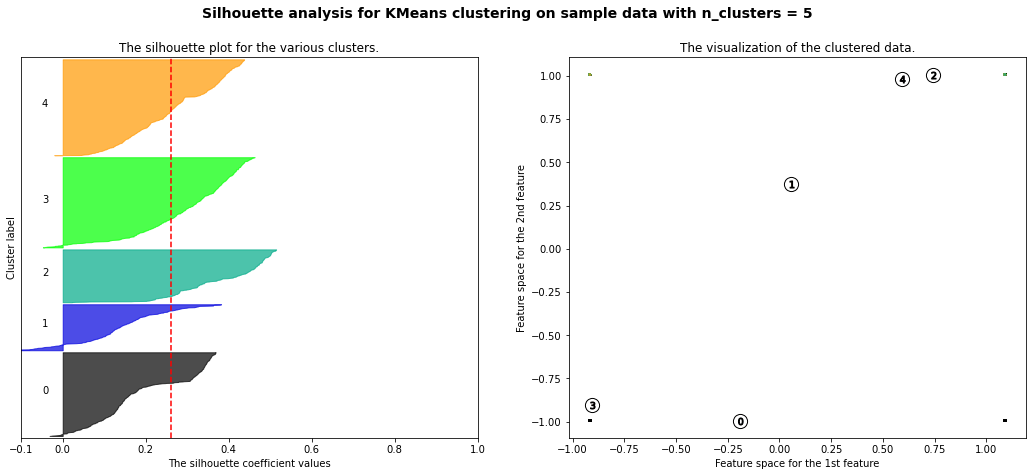

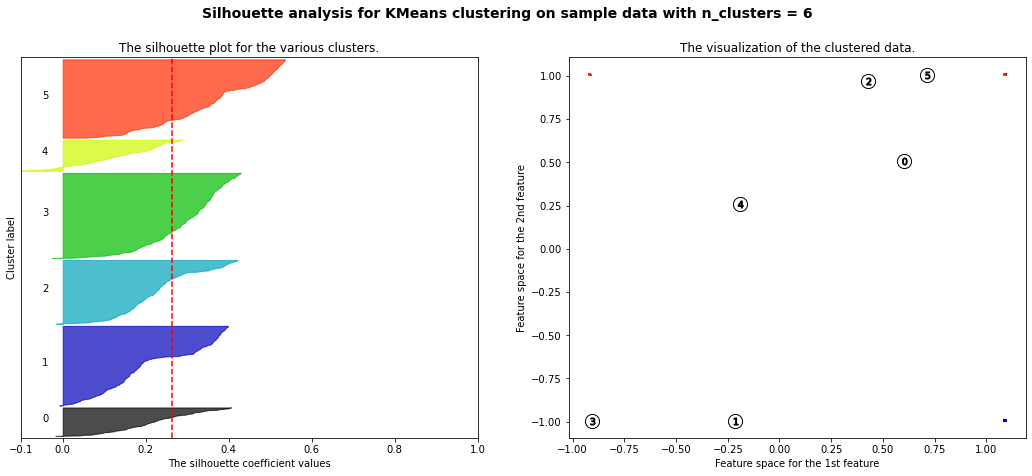

In [31]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df_scaled) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        df_scaled[:, 0], df_scaled[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


In [32]:
kmeans =KMeans(n_clusters =4, max_iter = 500,  init = 'k-means++')
kmeans.fit(df_scaled)

KMeans(max_iter=500, n_clusters=4)

In [34]:
df_segm_kmeans = df.copy()
df_segm_kmeans['Segment_KMeans'] = kmeans.labels_
df_segm_kmeans['Segment_KMeans'].replace({0: "A", 1: "B", 2: "C", 3:"D"}, inplace=True)
df_segm_analysis = df_segm_kmeans.groupby(['Segment_KMeans']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment_KMeans,,,,,,,
A,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
B,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
C,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
D,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


In [41]:
df_segm_analysis['N_Obs'] = df_segm_kmeans[['Segment_KMeans', 'Sex']].groupby(['Segment_KMeans'])['Sex'].count()
df_segm_analysis['Prop_Obs'] = df_segm_analysis.N_Obs / df_segm_analysis.N_Obs.sum()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N_Obs,Prop_Obs
Segment_KMeans,,,,,,,,,
A,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
B,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
C,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
D,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [42]:
df_segm_analysis.rename({'A':'well_off', 'B': 'fewer_opportunities', 
                         'C': 'career_oriented', 'D': 'standard' }, inplace =True)

In [44]:
df_segm_kmeans['Labels']  = df_segm_kmeans['Segment_KMeans'].map({'A':'well_off', 'B': 'fewer_opportunities', 
                         'C': 'career_oriented', 'D': 'standard' })

C:\Users\Yash Shetty\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


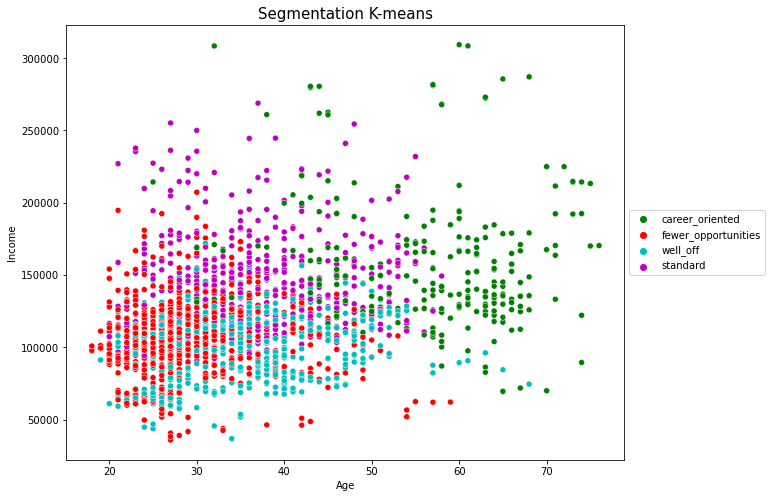

In [46]:
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans.Labels, palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means',fontsize = 15)
plt.legend( bbox_to_anchor = (1, 0.5), loc = 6)
plt.show()

In [35]:
from sklearn.decomposition import PCA 
pca = PCA() 
pca.fit(df_scaled)

PCA()

In [36]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0, 0.5, 'Cumulative Explained Variance')

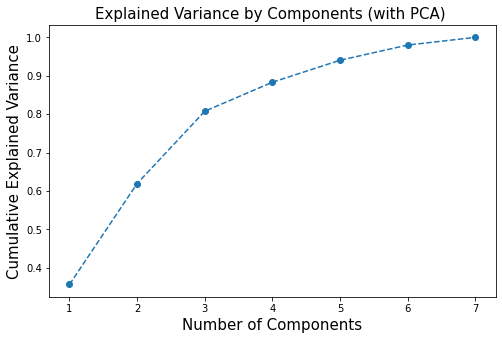

In [37]:
plt.figure(figsize =(8,5))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components (with PCA) ', fontsize= 15)
plt.xlabel('Number of Components', fontsize= 15)
plt.ylabel('Cumulative Explained Variance', fontsize= 15)

In [38]:
pca= PCA(n_components =3)
pca.fit(df_scaled)

PCA(n_components=3)

In [40]:
df_pca_comp = pd.DataFrame(data = pca.components_, columns =df.columns.values, 
                          index = ['component_1', 'component_2', 'component_3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
component_1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
component_2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
component_3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


In [48]:
scores_pca = pca.transform(df_scaled)
scores_pca

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [55]:
kmeans_pca = KMeans(n_clusters =4, init = 'k-means++')
kmeans_pca.fit(scores_pca)
df_seg_pca_kmeans = pd.concat([df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis =1)
df_seg_pca_kmeans.columns.values[-3:] =  ['component_1', 'component_2', 'component_3']
df_seg_pca_kmeans['Segment_KMeans_PCA'] = kmeans_pca.labels_
df_seg_pca_kmeans['Segment_KMeans_PCA'].replace({0: "W", 1: "X", 2: "Y", 3:"Z"}, inplace=True)
df_seg_pca_kmeans_freq = df_seg_pca_kmeans.groupby(['Segment_KMeans_PCA']).mean()
df_seg_pca_kmeans_freq['N_Obs'] = df_seg_pca_kmeans[['Segment_KMeans_PCA', 'Sex']].groupby(['Segment_KMeans_PCA'])['Sex'].count()
df_seg_pca_kmeans_freq['Prop_Obs'] = df_seg_pca_kmeans_freq.N_Obs / df_seg_pca_kmeans_freq.N_Obs.sum()
df_seg_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component_1,component_2,component_3,N_Obs,Prop_Obs
Segment_KMeans_PCA,,,,,,,,,,,,
W,0.305011,0.095861,35.315904,0.760349,93633.372549,0.250545,0.039216,-1.047610,-0.904856,1.005493,459,0.2295
X,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
Y,0.900576,0.963977,28.920749,1.061960,107571.126801,0.677233,0.439481,-1.106034,0.705300,-0.776925,694,0.3470
Z,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953,264,0.1320


In [56]:
df_seg_pca_kmeans['Label'] = df_seg_pca_kmeans['Segment_KMeans_PCA'].map({'Z':'well-off', 'Y': 'fewer-opportunities', 
                        'W': 'standard', 'X': 'career_focused'})

In [57]:
df_seg_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component_1,component_2,component_3,Segment_KMeans_PCA,Label
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,Z,well-off
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,Y,fewer-opportunities
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,W,standard
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,X,career_focused
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,X,career_focused
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,W,standard
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,Y,fewer-opportunities
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,W,standard
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,Y,fewer-opportunities


C:\Users\Yash Shetty\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


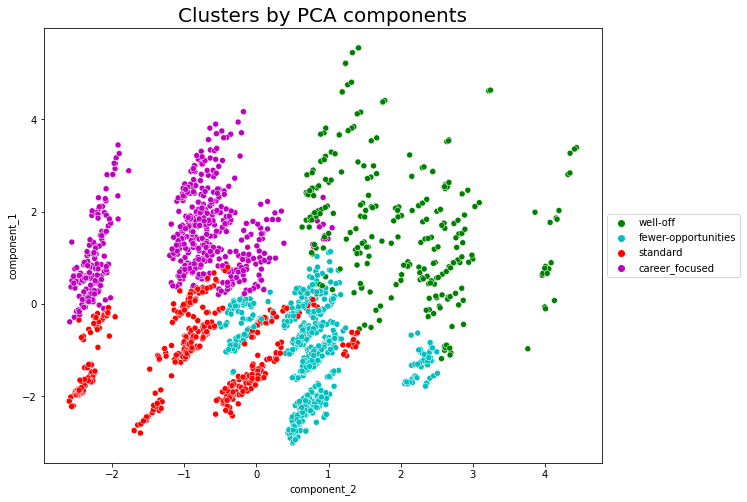

In [61]:
x_axis = df_seg_pca_kmeans['component_2']
y_axis = df_seg_pca_kmeans['component_1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_seg_pca_kmeans['Label'], palette =  ['g', 'c', 'r', 'm'] )
plt.title('Clusters by PCA components', fontsize =20)
plt.legend( bbox_to_anchor = (1, 0.5), loc = 6)
plt.show()

In [62]:
import pickle
pickle.dump(scaler, open('scaler.pickle', 'wb'))
pickle.dump(pca, open('pca.pickle', 'wb'))
pickle.dump(kmeans_pca, open('kmeans_pca.pickle', 'wb'))